In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df.head()

,Series_Title,Released_Year,Certificate,Runtime (min),Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# Movies per Year

In [3]:
release_years = df["Released_Year"].value_counts()

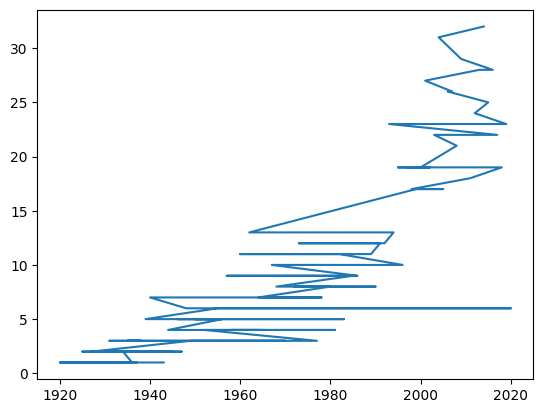

In [4]:
plt.plot(release_years.index, release_years.values)
plt.show()

That doesn't look right

In [5]:
sorted_release_years = df["Released_Year"].unique() # Just for diplaying the unique release years
sorted_release_years.sort()
sorted_release_years

array([1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

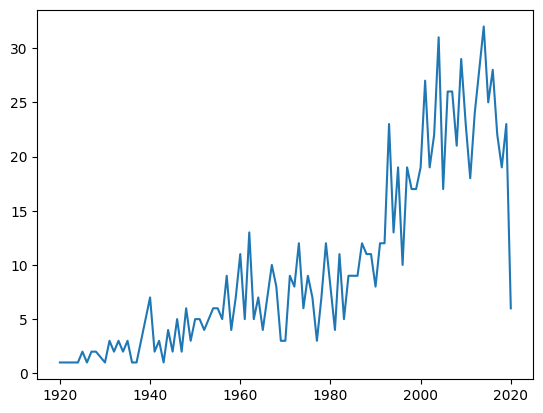

In [6]:
release_years = release_years.sort_index()
plt.plot(release_years.index, release_years.values)
plt.show()

In [7]:
release_years.tail(6)

Released_Year
2015    25
2016    28
2017    22
2018    19
2019    23
2020     6
Name: count, dtype: int64

The dataset might not be representitive of the entire year of 2020. So I'll remove that year from this graph.

In [8]:
release_years = release_years.drop(2020, axis="index")
release_years.tail()

Released_Year
2015    25
2016    28
2017    22
2018    19
2019    23
Name: count, dtype: int64

In [9]:
print("Min movie releases in a year:",release_years.min())
print("Max movie releases in a year:", release_years.max())

Min movie releases in a year: 1
Max movie releases in a year: 32


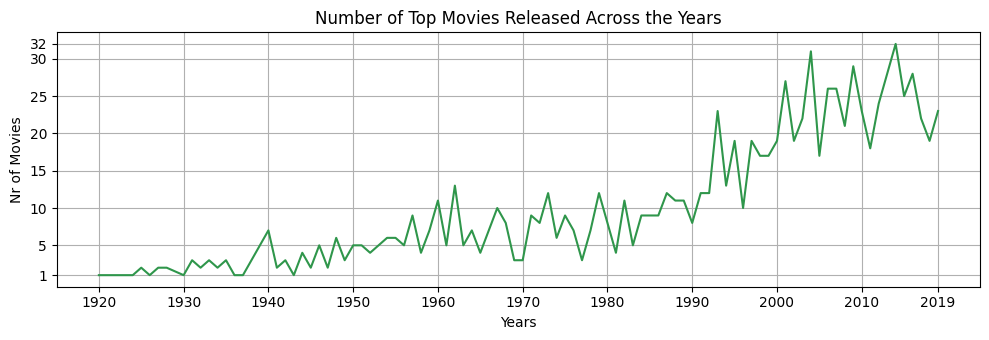

In [10]:
plt.figure(figsize=(10, 3.5))
plt.plot(release_years.index, release_years.values, color="#2f964b")
plt.title("Number of Top Movies Released Across the Years")
plt.xlabel("Years")
plt.ylabel("Nr of Movies")
plt.grid()
plt.xticks([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2019])
plt.yticks([1, 5, 10, 15, 20, 25, 30, 32])
plt.tight_layout()
plt.show()

# Gross Revenue

In [11]:
# Dataframe with valid grossing data sorted in descending order
df_gross_rev = df.loc[df["Gross_Revenue"] != -1].sort_values("Gross_Revenue", ascending=False)

In [12]:
dfTop3 = df_gross_rev[:3]
dfBottom3 = df_gross_rev[-3:]
dfCombined = pd.concat([dfTop3, dfBottom3])

In [13]:
import textwrap

wrapped_labels = [textwrap.fill(label, width=16) for label in dfCombined["Series_Title"]]

In [14]:
import numpy as np

x_positions = np.arange(len(wrapped_labels))
x_positions[3:] += 1 # shift the bottom 3 bars over by 1

In [15]:
def format_gross_revenue(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'  # Billions
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'  # Millions
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'  # Thousands
    else:
        return value

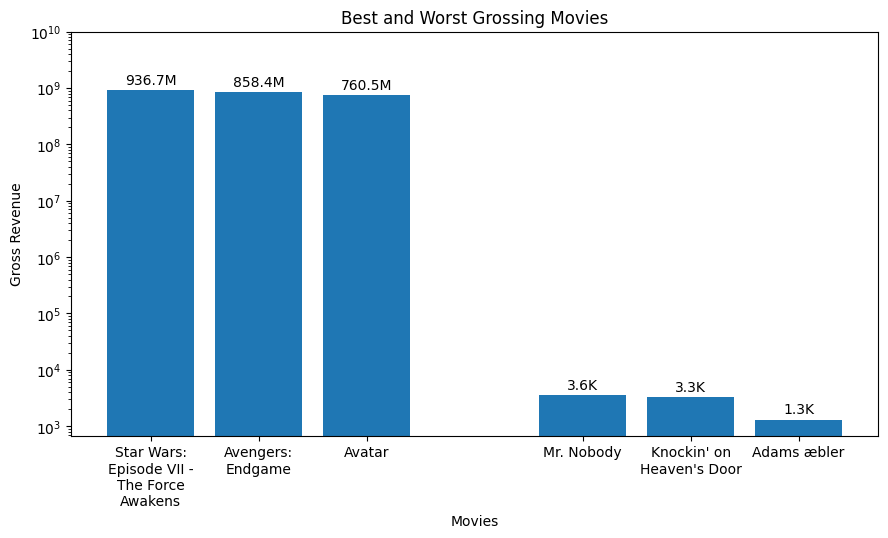

In [16]:
plt.figure(figsize=(9, 5))
plt.title("Best and Worst Grossing Movies")
plt.xlabel("Movies")
plt.ylabel("Gross Revenue")
plt.tight_layout()

barplot = plt.bar(x_positions, dfCombined["Gross_Revenue"])
plt.xticks(x_positions, wrapped_labels)

plt.yscale("log")  # Logarithmic Scaling
plt.yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])

formatted_labels = [format_gross_revenue(val) for val in dfCombined["Gross_Revenue"]]
plt.bar_label(barplot, labels=formatted_labels, padding=2)

plt.show()

# Ratings

Ratings by **the public**: "IMDB Ratings"\
Ratings by **critics**: "Meta Scores"

In [17]:
print("Min IMDB Rating:", df["IMDB_Rating"].min())
print("Max IMDB Rating:", df["IMDB_Rating"].max())

Min IMDB Rating: 7.6
Max IMDB Rating: 9.3


In [18]:
meta_scores = df["Meta_score"].loc[df["Meta_score"] != -1]

In [19]:
print("Min Meta Score:", meta_scores.min())
print("Max Meta Score:", meta_scores.max())

Min Meta Score: 28.0
Max Meta Score: 100.0


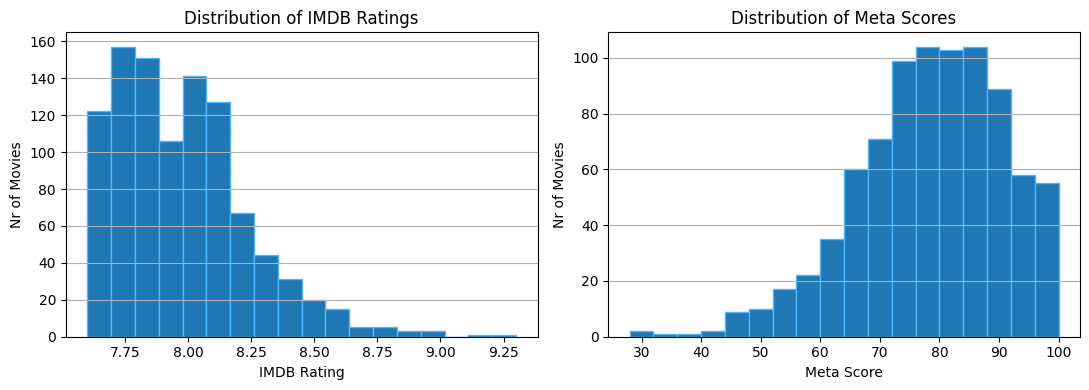

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

axes[0].hist(df["IMDB_Rating"], bins=18, edgecolor="#4db6ff")
axes[0].set_title("Distribution of IMDB Ratings")
axes[0].set_xlabel("IMDB Rating")
axes[0].set_ylabel("Nr of Movies")
axes[0].grid(axis="y")

axes[1].hist(meta_scores, bins=18, edgecolor="#4db6ff")
axes[1].set_title("Distribution of Meta Scores")
axes[1].set_xlabel("Meta Score")
axes[1].set_ylabel("Nr of Movies")
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()

# Runtime/Duration

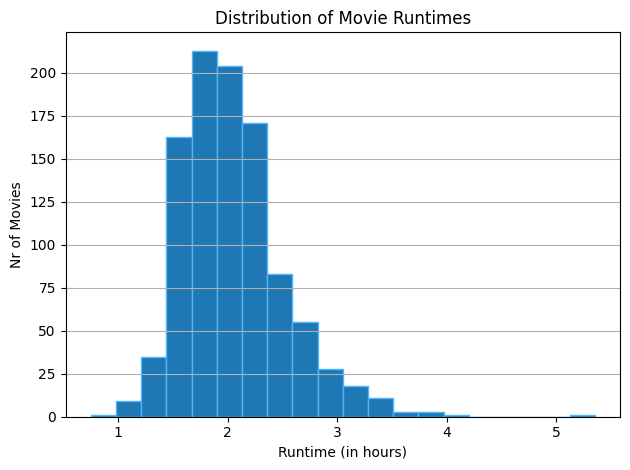

In [21]:
runtime_hours = df["Runtime (min)"]/60

plt.hist(runtime_hours, bins=20, edgecolor="#4db6ff")

plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (in hours)")
plt.ylabel("Nr of Movies")

plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [22]:
print("Min Runtime:", df["Runtime (min)"].min())
print("Max Runtime:", df["Runtime (min)"].max())

Min Runtime: 45
Max Runtime: 321


In [23]:
df.loc[(df["Runtime (min)"] == 45) | (df["Runtime (min)"] == 321)]

,Series_Title,Released_Year,Certificate,Runtime (min),Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Revenue
140,Gangs of Wasseypur,2012,A,321,"Action, Comedy, Crime",8.2,89.0,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,82365,-1
194,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,-1.0,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375


I googled it. It turns out that "Gangs of Wasseypur" was released in 2 parts, each part being over 2 hours, which explains the **very** long runtime.

# Top Directors

In [24]:
director_avg_rating = df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(7)

In [25]:
print("Min Avg Rating:", director_avg_rating.min())
print("Max Avg Rating:", director_avg_rating.max())

Min Avg Rating: 8.6
Max Avg Rating: 8.95


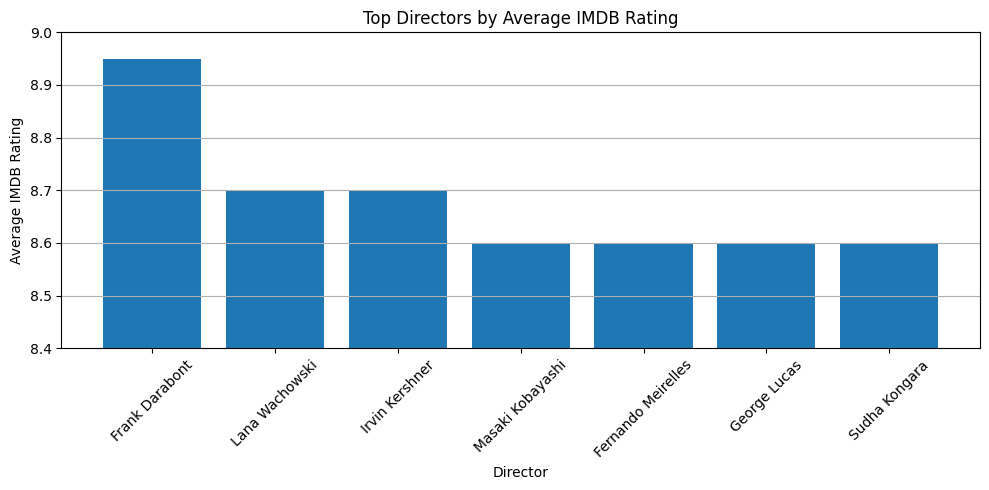

In [26]:
plt.figure(figsize=(10, 5))

plt.bar(director_avg_rating.index, director_avg_rating.values)
plt.xticks(rotation=45)
plt.ylim(bottom=8.4, top=9)

plt.title("Top Directors by Average IMDB Rating")
plt.xlabel("Director")
plt.ylabel("Average IMDB Rating")

plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Top Genres

In [27]:
genres = df["Genre"].str.split(', ').explode()
# ".split(', ')" ---> splits each string in the 'Genre' column into a List of individual genres
# ".explode()" ---> transforms each List of genres into separate rows

genres.head(8)

0     Drama
1     Crime
1     Drama
2    Action
2     Crime
2     Drama
3     Crime
3     Drama
Name: Genre, dtype: object

In [28]:
genre_counts = genres.value_counts()

In [29]:
top_10_genres = genre_counts.head(10)
top_10_genres = top_10_genres.iloc[::-1] # Reverse the series, purely for visual aesthetic in the bar graph

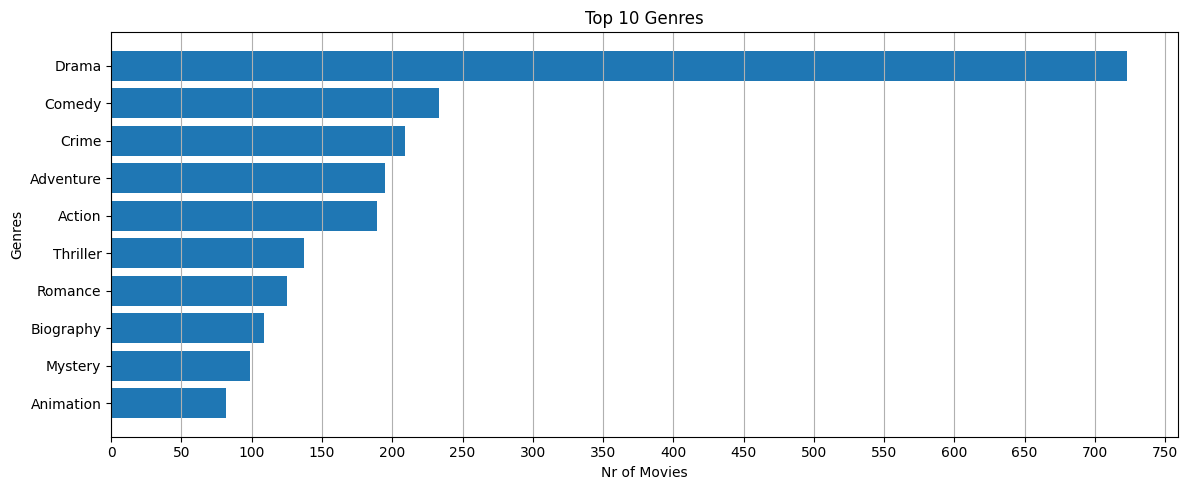

In [30]:
plt.figure(figsize=(12, 5))

plt.barh(top_10_genres.index, top_10_genres.values)
plt.xticks([x for x in range(0, 751, 50)])

plt.title("Top 10 Genres")
plt.ylabel("Genres")
plt.xlabel("Nr of Movies")

plt.grid(axis="x")
plt.tight_layout()
plt.show()

This includes movies with combined genres.

In [31]:
genre_counts = df["Genre"].value_counts()
combined_genres = genre_counts[genre_counts.index.str.contains(",")] # To only include Genre Combinations

top_10_combined_genres = combined_genres.head(10)
top_10_combined_genres = top_10_combined_genres.iloc[::-1] # Again, just reversing it for visual aesthetic

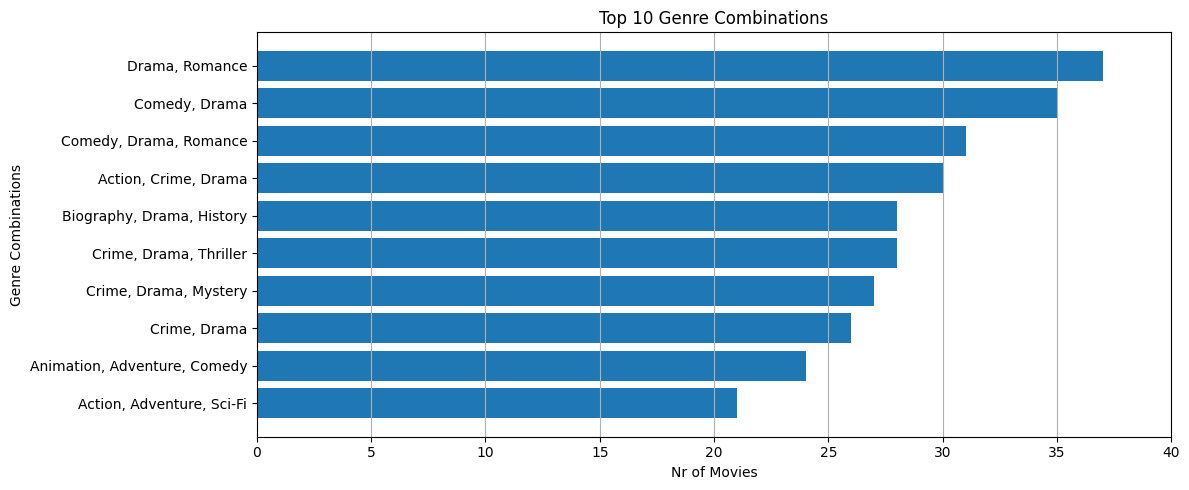

In [32]:
plt.figure(figsize=(12, 5))

plt.barh(top_10_combined_genres.index, top_10_combined_genres.values)
plt.xticks([x for x in range(0, 41, 5)])

plt.title("Top 10 Genre Combinations")
plt.ylabel("Genre Combinations")
plt.xlabel("Nr of Movies")

plt.grid(axis="x")
plt.tight_layout()
plt.show()